# TALLER 3B MÉTODOS ITERATIVOS

**Nombre:** Camila Caicedo

**Grupo:** GR1CC

**Fecha:** 21/01/2026

**Enlace al repositorio:** https://github.com/dxcam/TalleresMetodosNumericos.git

**Grafique la trayectoria de los siguientes sistemas de ecuaciones:**

$x_1+x_2=7$

$−2x_1+5x_2=0$

- $X_0=(0,0)$
- $X_0=(5,2)$


$x_1+x_2=6$

$−2x_1+x_2=0$

**Prueba 3 posiciones iniciales, encuentre una en la que diverge el sistema.**

In [19]:
from src.iterative_methods import gauss_jacobi
from src.iterative_methods import gauss_seidel

In [4]:
import logging
import os
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format=f"[%(asctime)s][%(levelname)s][{os.environ.get('USERNAME')}] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

[01-21 10:12:04][INFO][pc] 2026-01-21 10:12:04.106472


## EJEMPLO 1

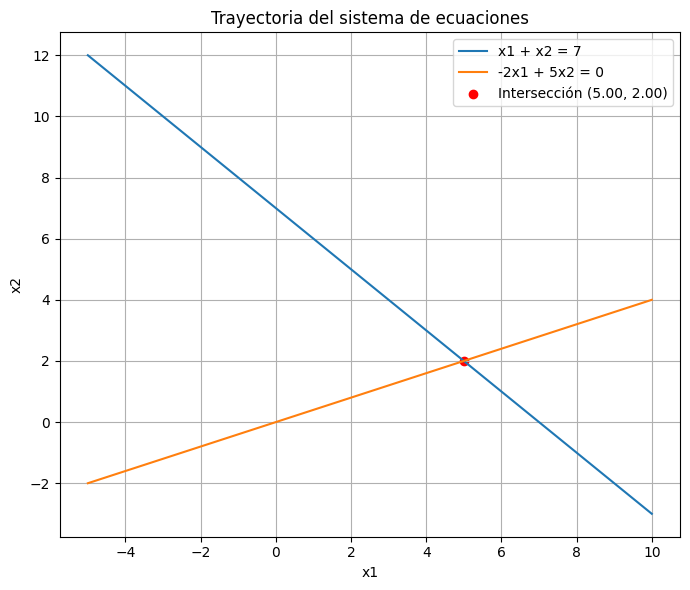

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos el rango para x1
x1 = np.linspace(-5, 10, 400)

# Ecuaciones del sistema
# x1 + x2 = 7  -> x2 = 7 - x1
x2_1 = 7 - x1

# -2x1 + 5x2 = 0 -> x2 = (2/5)*x1
x2_2 = (2/5) * x1

plt.figure(figsize=(7,6))
plt.plot(x1, x2_1, label='x1 + x2 = 7')
plt.plot(x1, x2_2, label='-2x1 + 5x2 = 0')

# Punto de intersección resolviendo el sistema
A = np.array([[1,1],[-2,5]])
b = np.array([7,0])
x_sol = np.linalg.solve(A,b)

plt.scatter(x_sol[0], x_sol[1], color='red', label=f'Intersección ({x_sol[0]:.2f}, {x_sol[1]:.2f})')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trayectoria del sistema de ecuaciones')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


### Jacobi

In [62]:
n = 2

In [63]:
def gauss_jacobi(
    *, A: np.ndarray, b: np.ndarray, x: np.ndarray, tol: float, max_iter: int
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Jacobi.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x, np.ndarray):
        x = np.array(x, dtype=float, ndmin=2).T
    assert x.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter + 1):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new
        x = x_new.copy()
        logging.info(f"i= {k} x: {x_new.T}")

    return x


In [24]:
gauss_jacobi(A=A, b=b, x=[0] * n, tol=1e-5, max_iter=10)  

[01-21 10:21:07][INFO][pc] i= 0 x: [[0. 0.]]
[01-21 10:21:07][INFO][pc] i= 1 x: [[7. 0.]]
[01-21 10:21:07][INFO][pc] i= 2 x: [[7.  2.8]]
[01-21 10:21:07][INFO][pc] i= 3 x: [[4.2 2.8]]
[01-21 10:21:07][INFO][pc] i= 4 x: [[4.2  1.68]]
[01-21 10:21:07][INFO][pc] i= 5 x: [[5.32 1.68]]
[01-21 10:21:07][INFO][pc] i= 6 x: [[5.32  2.128]]
[01-21 10:21:07][INFO][pc] i= 7 x: [[4.872 2.128]]
[01-21 10:21:07][INFO][pc] i= 8 x: [[4.872  1.9488]]
[01-21 10:21:07][INFO][pc] i= 9 x: [[5.0512 1.9488]]
[01-21 10:21:07][INFO][pc] i= 10 x: [[5.0512  2.02048]]


array([[5.0512 ],
       [2.02048]])

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------
# Método de Jacobi con almacenamiento de trayectoria
def gauss_jacobi_traj(A, b, x0, tol=1e-5, max_iter=20):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    x = np.array(x0, dtype=float).reshape(-1, 1)

    traj = [x.copy()]

    n = len(b)
    for _ in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            suma = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / A[i, i]

        traj.append(x_new.copy())

        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new

    return traj


# -----------------------------------------
# Función para graficar trayectorias
def plot_trajectories(trajs, title):
    plt.figure(figsize=(7, 7))

    for k, traj in enumerate(trajs):
        xs = [x[0, 0] for x in traj]
        ys = [x[1, 0] for x in traj]

        plt.plot(xs, ys, marker='o', label=f'X0 #{k+1}')
        for i, (x, y) in enumerate(zip(xs, ys)):
            plt.text(x, y, f'{i}', fontsize=9)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()


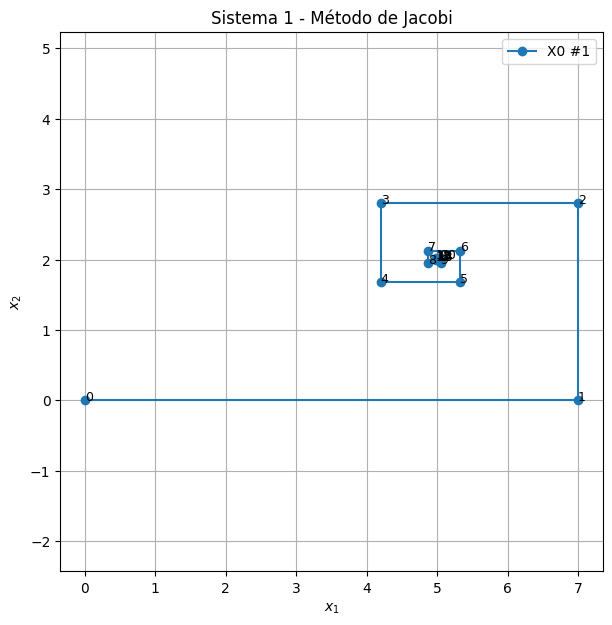

In [49]:
A1 = [[1, 1],
      [-2, 5]]
b1 = [7, 0]

x0_list_1 = [
    [0, 0],
]

trajs1 = [gauss_jacobi_traj(A1, b1, x0, max_iter=15) for x0 in x0_list_1]
plot_trajectories(trajs1, "Sistema 1 - Método de Jacobi")


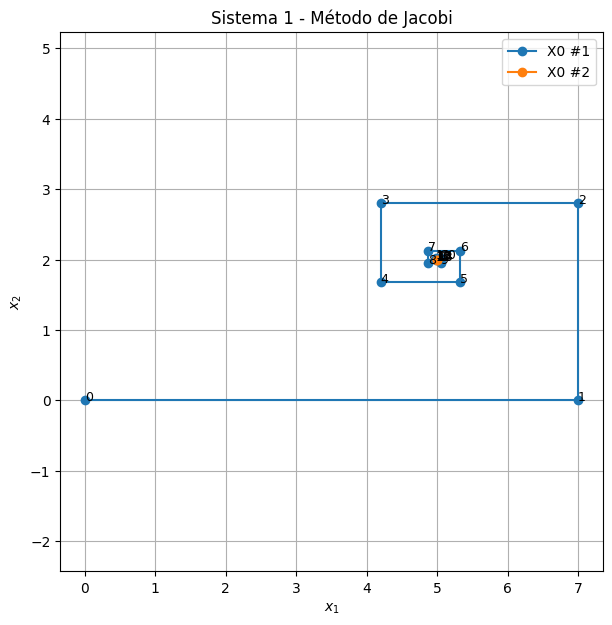

In [52]:
A1 = [[1, 1],
      [-2, 5]]
b1 = [7, 0]

x0_list_1 = [
    [0, 0],
    [5, 2]
]

trajs1 = [gauss_jacobi_traj(A1, b1, x0, max_iter=15) for x0 in x0_list_1]
plot_trajectories(trajs1, "Sistema 1 - Método de Jacobi")


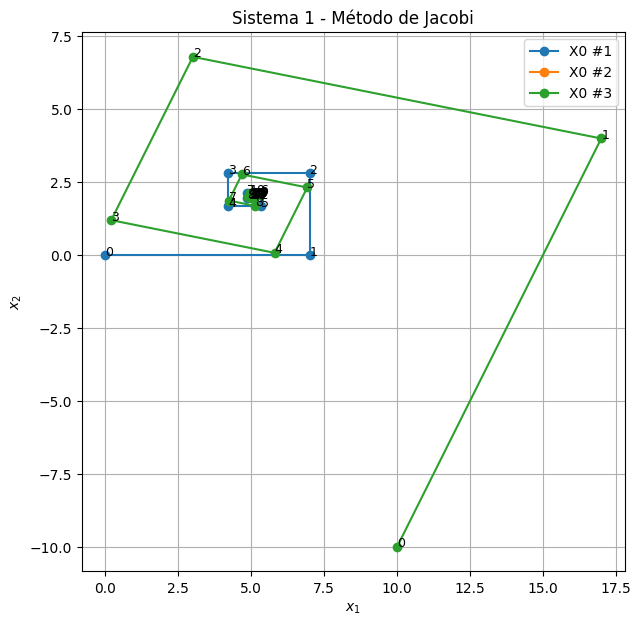

In [53]:
A1 = [[1, 1],
      [-2, 5]]
b1 = [7, 0]

x0_list_1 = [
    [0, 0],
    [5, 2],
    [10, -10]   # posible divergente
]

trajs1 = [gauss_jacobi_traj(A1, b1, x0, max_iter=15) for x0 in x0_list_1]
plot_trajectories(trajs1, "Sistema 1 - Método de Jacobi")


El Sistema 1 converge con Jacobi porque es diagonalmente dominante.

### Gauss-Seidel

In [64]:
def gauss_seidel(
    *, A: np.ndarray, b: np.ndarray, x: np.ndarray, tol: float, max_iter: int
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Gauss-Seidel.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x, np.ndarray):
        x = np.array(x, dtype=float, ndmin=2).T
    assert x.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]

    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter + 1):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x_new[j] for j in range(i) if j != i]) + sum(
                [A[i, j] * x[j] for j in range(i, n) if j != i]
            )
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new

        x = x_new.copy()
        logging.info(f"i= {k} x: {x.T}")

    return x

In [65]:
gauss_seidel(A=A, b=b, x=[0] * n, tol=1e-5, max_iter=10)

[01-21 10:44:15][INFO][pc] i= 0 x: [[0. 0.]]
[01-21 10:44:15][INFO][pc] i= 1 x: [[7.  2.8]]
[01-21 10:44:15][INFO][pc] i= 2 x: [[4.2  1.68]]
[01-21 10:44:15][INFO][pc] i= 3 x: [[5.32  2.128]]
[01-21 10:44:15][INFO][pc] i= 4 x: [[4.872  1.9488]]
[01-21 10:44:15][INFO][pc] i= 5 x: [[5.0512  2.02048]]
[01-21 10:44:15][INFO][pc] i= 6 x: [[4.97952  1.991808]]
[01-21 10:44:15][INFO][pc] i= 7 x: [[5.008192  2.0032768]]
[01-21 10:44:15][INFO][pc] i= 8 x: [[4.9967232  1.99868928]]
[01-21 10:44:15][INFO][pc] i= 9 x: [[5.00131072 2.00052429]]
[01-21 10:44:15][INFO][pc] i= 10 x: [[4.99947571 1.99979028]]


array([[4.99947571],
       [1.99979028]])

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------
# Método de Gauss-Seidel con almacenamiento de trayectoria
def gauss_seidel_traj(A, b, x0, tol=1e-5, max_iter=20):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    x = np.array(x0, dtype=float).reshape(-1, 1)

    traj = [x.copy()]
    n = len(b)

    for _ in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            suma = sum(A[i, j] * x_new[j] for j in range(i)) + \
                   sum(A[i, j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - suma) / A[i, i]

        traj.append(x_new.copy())

        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new

    return traj


# -----------------------------------------
# Función para graficar trayectorias
def plot_trajectories(trajs, title):
    plt.figure(figsize=(7, 7))

    for k, traj in enumerate(trajs):
        xs = [x[0, 0] for x in traj]
        ys = [x[1, 0] for x in traj]

        plt.plot(xs, ys, marker='o', label=f'X0 #{k+1}')
        for i, (x, y) in enumerate(zip(xs, ys)):
            plt.text(x, y, f'{i}', fontsize=9)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()


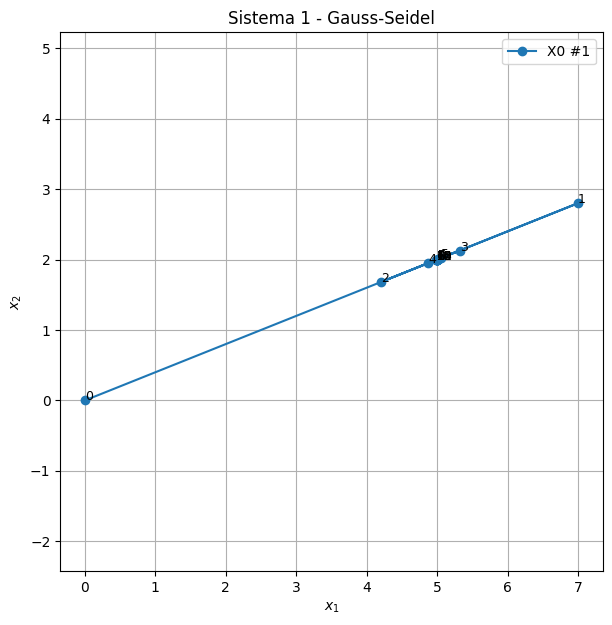

In [68]:
A1 = [[1, 1],
      [-2, 5]]
b1 = [7, 0]

x0_list_1 = [
    [0, 0],
]

trajs1 = [gauss_seidel_traj(A1, b1, x0, max_iter=15) for x0 in x0_list_1]
plot_trajectories(trajs1, "Sistema 1 - Gauss-Seidel")


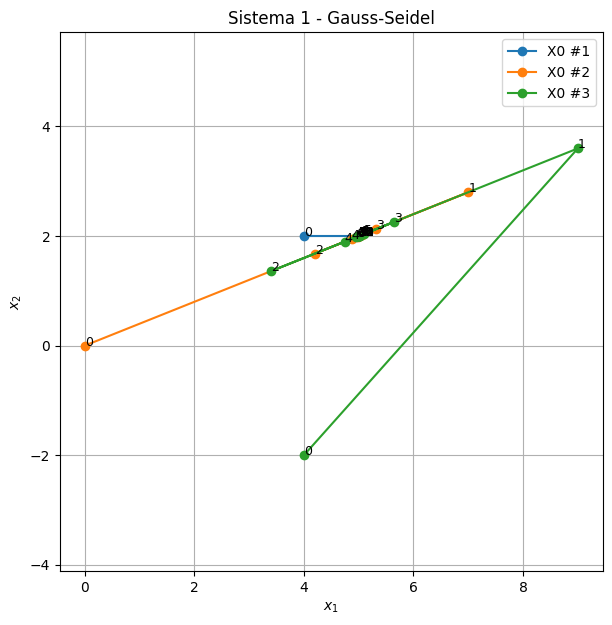

In [79]:
A1 = [[1, 1],
      [-2, 5]]
b1 = [7, 0]

x0_list_1 = [
    [4,2],
    [0, 0],
    [4,-2],
]

trajs1 = [gauss_seidel_traj(A1, b1, x0, max_iter=15) for x0 in x0_list_1]
plot_trajectories(trajs1, "Sistema 1 - Gauss-Seidel")


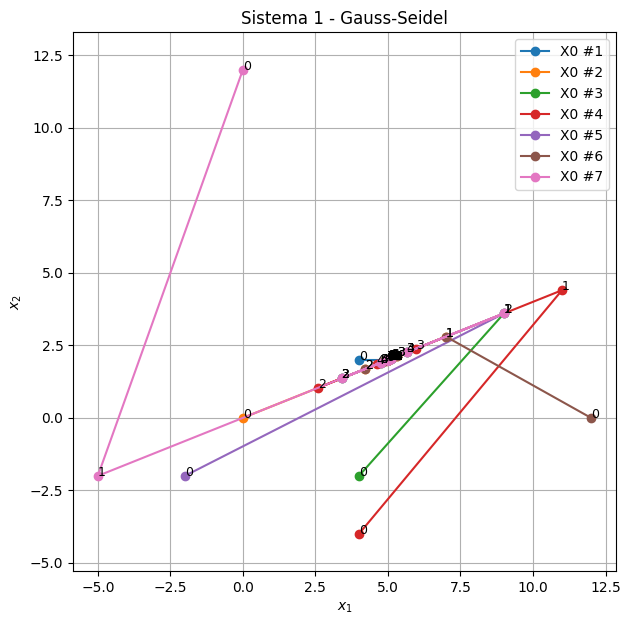

In [80]:
A1 = [[1, 1],
      [-2, 5]]
b1 = [7, 0]

x0_list_1 = [
    [4,2],
    [0, 0],
    [4,-2],
     [4,-4],
      [-2,-2],
      [12,0],
      [0,12]
]

trajs1 = [gauss_seidel_traj(A1, b1, x0, max_iter=15) for x0 in x0_list_1]
plot_trajectories(trajs1, "Sistema 1 - Gauss-Seidel")


## Ejemplo 2

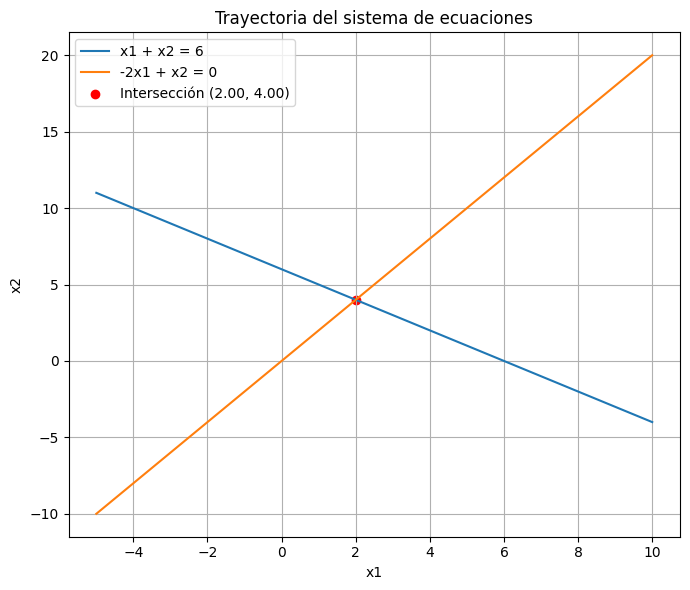

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Rango para x1
x1 = np.linspace(-5, 10, 400)

# Ecuaciones del sistema
# x1 + x2 = 6  -> x2 = 6 - x1
x2_1 = 6 - x1

# -2x1 + x2 = 0 -> x2 = 2*x1
x2_2 = 2 * x1

# Graficar
plt.figure(figsize=(7,6))
plt.plot(x1, x2_1, label='x1 + x2 = 6')
plt.plot(x1, x2_2, label='-2x1 + x2 = 0')

# Punto de intersección
A = np.array([[1,1],[-2,1]])
b = np.array([6,0])
x_sol = np.linalg.solve(A,b)

plt.scatter(x_sol[0], x_sol[1], color='red', label=f'Intersección ({x_sol[0]:.2f}, {x_sol[1]:.2f})')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trayectoria del sistema de ecuaciones')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


### Jacobi

In [41]:
gauss_jacobi(A=A, b=b, x=[0] * n, tol=1e-5, max_iter=10) 

[01-21 10:29:26][INFO][pc] i= 0 x: [[0. 0.]]
[01-21 10:29:26][INFO][pc] i= 1 x: [[6. 0.]]
[01-21 10:29:26][INFO][pc] i= 2 x: [[ 6. 12.]]
[01-21 10:29:26][INFO][pc] i= 3 x: [[-6. 12.]]
[01-21 10:29:26][INFO][pc] i= 4 x: [[ -6. -12.]]
[01-21 10:29:26][INFO][pc] i= 5 x: [[ 18. -12.]]
[01-21 10:29:26][INFO][pc] i= 6 x: [[18. 36.]]
[01-21 10:29:26][INFO][pc] i= 7 x: [[-30.  36.]]
[01-21 10:29:26][INFO][pc] i= 8 x: [[-30. -60.]]
[01-21 10:29:26][INFO][pc] i= 9 x: [[ 66. -60.]]
[01-21 10:29:26][INFO][pc] i= 10 x: [[ 66. 132.]]


array([[ 66.],
       [132.]])

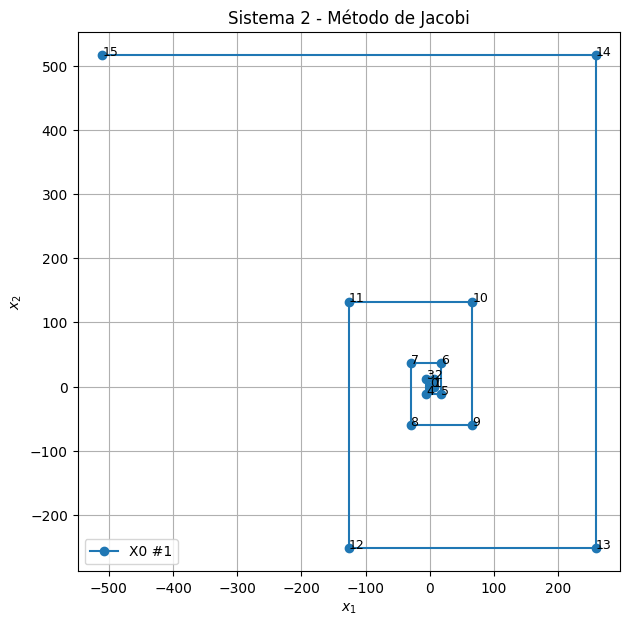

In [54]:
A2 = [[1, 1],
      [-2, 1]]
b2 = [6, 0]

x0_list_2 = [
    [0, 0],
]

trajs2 = [gauss_jacobi_traj(A2, b2, x0, max_iter=15) for x0 in x0_list_2]
plot_trajectories(trajs2, "Sistema 2 - Método de Jacobi")


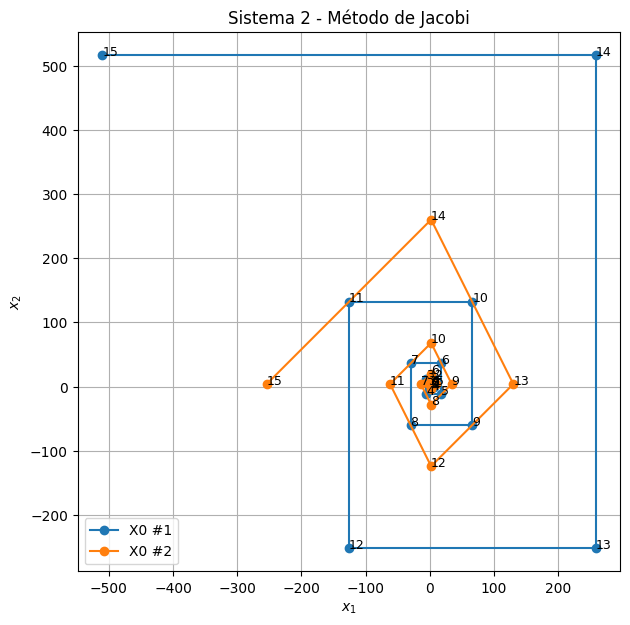

In [55]:
A2 = [[1, 1],
      [-2, 1]]
b2 = [6, 0]

x0_list_2 = [
    [0, 0],
    [2, 2],
]

trajs2 = [gauss_jacobi_traj(A2, b2, x0, max_iter=15) for x0 in x0_list_2]
plot_trajectories(trajs2, "Sistema 2 - Método de Jacobi")


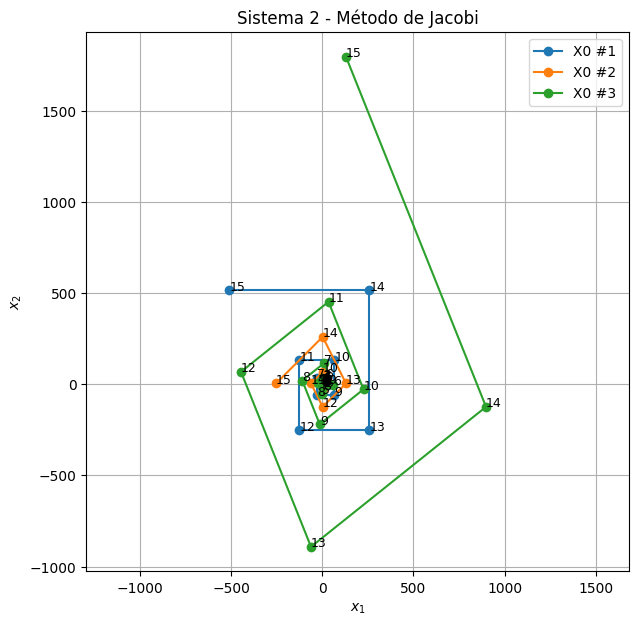

In [56]:
A2 = [[1, 1],
      [-2, 1]]
b2 = [6, 0]

x0_list_2 = [
    [0, 0],
    [2, 2],
    [-5, 5]    # probable divergente
]

trajs2 = [gauss_jacobi_traj(A2, b2, x0, max_iter=15) for x0 in x0_list_2]
plot_trajectories(trajs2, "Sistema 2 - Método de Jacobi")


## Gauss–Seidel

In [86]:
def gauss_seidel(
    *, A: np.ndarray, b: np.ndarray, x: np.ndarray, tol: float, max_iter: int
) -> np.ndarray:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Gauss-Seidel.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x, np.ndarray):
        x = np.array(x, dtype=float, ndmin=2).T
    assert x.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]

    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter + 1):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x_new[j] for j in range(i) if j != i]) + sum(
                [A[i, j] * x[j] for j in range(i, n) if j != i]
            )
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new

        x = x_new.copy()
        logging.info(f"i= {k} x: {x.T}")

    return x

In [87]:
A2 = [[1, 1],
      [-2, 1]]
b2 = [6, 0]
n=2

In [88]:
gauss_seidel(A=A, b=b, x=[0] * n, tol=1e-5, max_iter=10)

[01-21 10:55:33][INFO][pc] i= 0 x: [[0. 0.]]
[01-21 10:55:33][INFO][pc] i= 1 x: [[ 6. 12.]]
[01-21 10:55:33][INFO][pc] i= 2 x: [[ -6. -12.]]
[01-21 10:55:33][INFO][pc] i= 3 x: [[18. 36.]]
[01-21 10:55:33][INFO][pc] i= 4 x: [[-30. -60.]]
[01-21 10:55:33][INFO][pc] i= 5 x: [[ 66. 132.]]
[01-21 10:55:33][INFO][pc] i= 6 x: [[-126. -252.]]
[01-21 10:55:33][INFO][pc] i= 7 x: [[258. 516.]]
[01-21 10:55:33][INFO][pc] i= 8 x: [[ -510. -1020.]]
[01-21 10:55:33][INFO][pc] i= 9 x: [[1026. 2052.]]
[01-21 10:55:33][INFO][pc] i= 10 x: [[-2046. -4092.]]


array([[-2046.],
       [-4092.]])

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------
# Método de Gauss-Seidel con almacenamiento de trayectoria
def gauss_seidel_traj(A, b, x0, tol=1e-5, max_iter=20):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    x = np.array(x0, dtype=float).reshape(-1, 1)

    traj = [x.copy()]
    n = len(b)

    for _ in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            suma = sum(A[i, j] * x_new[j] for j in range(i)) + \
                   sum(A[i, j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - suma) / A[i, i]

        traj.append(x_new.copy())

        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new

    return traj


# -----------------------------------------
# Función para graficar trayectorias
def plot_trajectories(trajs, title):
    plt.figure(figsize=(7, 7))

    for k, traj in enumerate(trajs):
        xs = [x[0, 0] for x in traj]
        ys = [x[1, 0] for x in traj]

        plt.plot(xs, ys, marker='o', label=f'X0 #{k+1}')
        for i, (x, y) in enumerate(zip(xs, ys)):
            plt.text(x, y, f'{i}', fontsize=9)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()


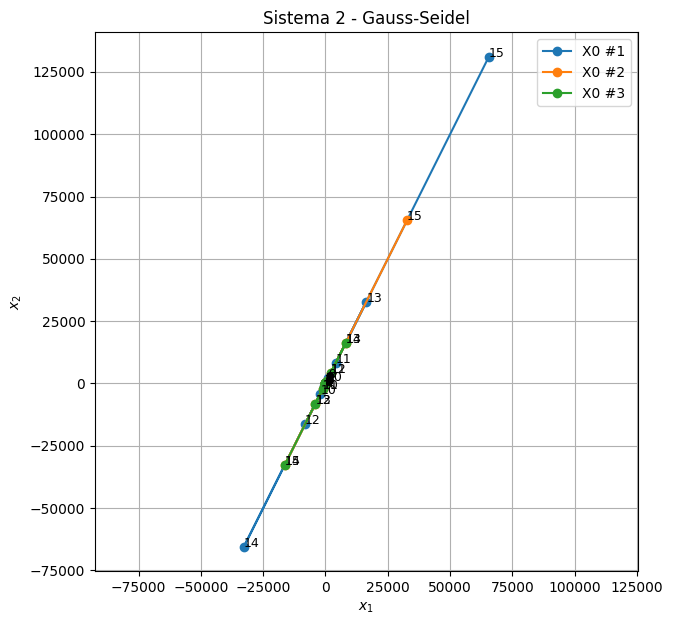

In [90]:
A2 = [[1, 1],
      [-2, 1]]
b2 = [6, 0]

x0_list_2 = [
    [0, 0],
    [2, 2],
    [-5, 5]    # condición divergente
]

trajs2 = [gauss_seidel_traj(A2, b2, x0, max_iter=15) for x0 in x0_list_2]
plot_trajectories(trajs2, "Sistema 2 - Gauss-Seidel")


## Ejercicio 3

A = 
\begin{bmatrix}
1 & -1 & 2 & 0 \\
-1 & 1 & -1 & 3 \\
2 & -1 & 1 & -1 \\
0 & 3 & -1 & 2
\end{bmatrix} 
b =
\begin{bmatrix}
1360 \\
1130 \\
1350 \\
3650
\end{bmatrix}


### Gauss-Jacobi

In [97]:
A3 = [[1, -1,  2,  0],
      [-1, 1, -1,  3],
      [2, -1,  1, -1],
      [0,  3, -1,  2]]

b3 = [1360, 1130, 1350, 3650]
n = 4


In [98]:
gauss_jacobi(A=A, b=b, x=[0] * n, tol=1e-5, max_iter=10)  

[01-21 11:11:14][INFO][pc] i= 0 x: [[0. 0. 0. 0.]]
[01-21 11:11:14][INFO][pc] i= 1 x: [[1360. 1130. 1350. 1825.]]
[01-21 11:11:14][INFO][pc] i= 2 x: [[ -210. -1635.  1585.   805.]]
[01-21 11:11:14][INFO][pc] i= 3 x: [[-3445.    90.   940.  5070.]]
[01-21 11:11:14][INFO][pc] i= 4 x: [[  -430. -16585.  13400.   2160.]]
[01-21 11:11:14][INFO][pc] i= 5 x: [[-42025.    7620.  -12215.   33402.5]]
[01-21 11:11:14][INFO][pc] i= 6 x: [[  33410.  -153317.5  126422.5  -15712.5]]
[01-21 11:11:14][INFO][pc] i= 7 x: [[-404802.5  208100.  -234500.   295012.5]]
[01-21 11:11:14][INFO][pc] i= 8 x: [[  678460.  -1523210.   1314067.5  -427575. ]]
[01-21 11:11:14][INFO][pc] i= 9 x: [[-4149985.    3276382.5  -3306355.    2943673.75]]
[01-21 11:11:14][INFO][pc] i= 10 x: [[  9890452.5  -16286231.25  14521376.25  -6565926.25]]


array([[  9890452.5 ],
       [-16286231.25],
       [ 14521376.25],
       [ -6565926.25]])

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------
# Método de Jacobi con almacenamiento de trayectoria
def gauss_jacobi_traj(A, b, x0, tol=1e-5, max_iter=25):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    x = np.array(x0, dtype=float).reshape(-1, 1)

    traj = [x.copy()]
    n = len(b)

    for _ in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            suma = sum(A[i, j] * x[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - suma) / A[i, i]

        traj.append(x_new.copy())

        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new

    return traj


In [104]:
x0_list_3 = [
    [0, 0, 0, 0],               # neutra
    [1000, 1000, 1000, 1000],   # grande positiva
    [-5000, 5000, -5000, 5000]  # muy grande, suele divergir
]


In [105]:
def plot_trajectories_4d(trajs, title):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    pairs = [(0, 1), (0, 2), (1, 2), (2, 3)]
    titles = [r"$(x_1,x_2)$", r"$(x_1,x_3)$", r"$(x_2,x_3)$", r"$(x_3,x_4)$"]

    for ax, (i, j), t in zip(axs.flat, pairs, titles):
        for k, traj in enumerate(trajs):
            xs = [x[i, 0] for x in traj]
            ys = [x[j, 0] for x in traj]
            ax.plot(xs, ys, marker='o', label=f'X0 #{k+1}')
            for n, (xv, yv) in enumerate(zip(xs, ys)):
                ax.text(xv, yv, f'{n}', fontsize=8)

        ax.set_xlabel(f'$x_{i+1}$')
        ax.set_ylabel(f'$x_{j+1}$')
        ax.set_title(t)
        ax.grid(True)

    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    fig.suptitle(title, fontsize=14)
    plt.show()


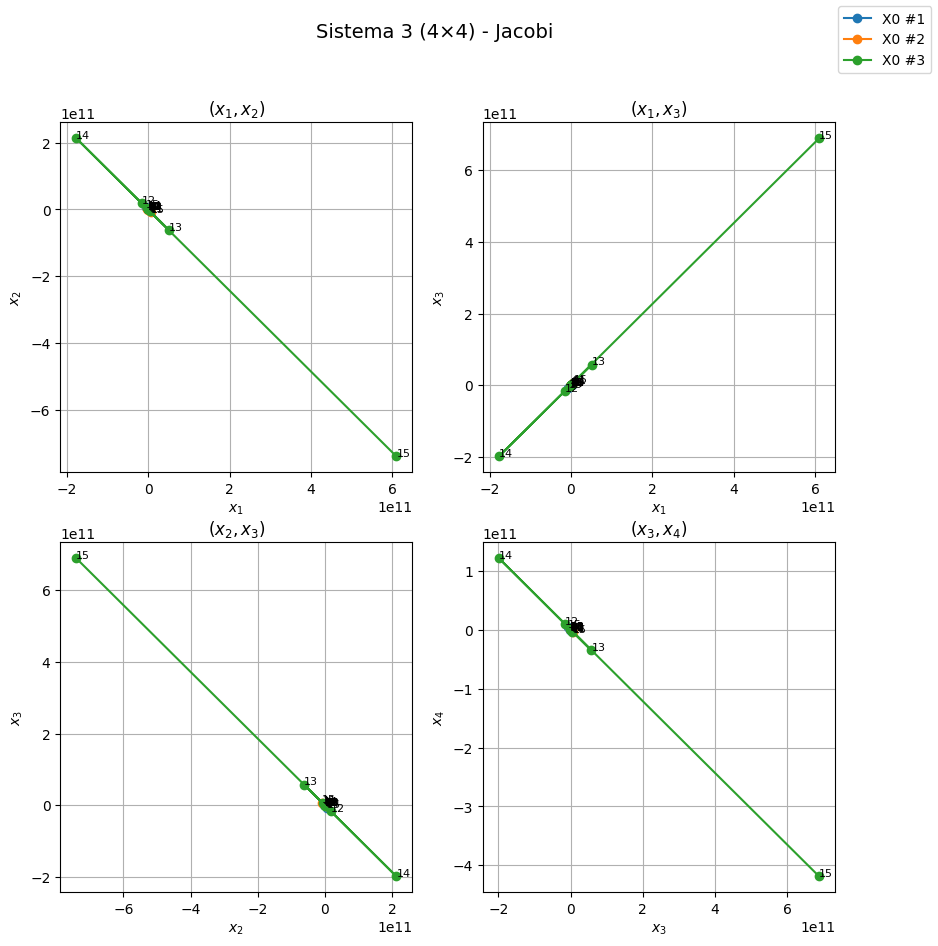

In [106]:
trajs3_jacobi = [gauss_jacobi_traj(A3, b3, x0, max_iter=15) for x0 in x0_list_3]
plot_trajectories_4d(trajs3_jacobi, "Sistema 3 (4×4) - Jacobi")

### Gauss-Seidel

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------
# Método de Gauss-Seidel con trayectoria
def gauss_seidel_traj(A, b, x0, tol=1e-5, max_iter=25):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    x = np.array(x0, dtype=float).reshape(-1, 1)

    traj = [x.copy()]
    n = len(b)

    for _ in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            suma = sum(A[i, j] * x_new[j] for j in range(i)) + \
                   sum(A[i, j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - suma) / A[i, i]

        traj.append(x_new.copy())

        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new

    return traj


In [100]:
x0_list_3 = [
    [0, 0, 0, 0],           # neutra
    [1000, 1000, 1000, 1000],  # grande positiva
    [-5000, 5000, -5000, 5000] # muy grande, suele divergir
]


In [101]:
def plot_trajectories_4d(trajs, title):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    pairs = [(0, 1), (0, 2), (1, 2), (2, 3)]
    titles = [r"$(x_1,x_2)$", r"$(x_1,x_3)$", r"$(x_2,x_3)$", r"$(x_3,x_4)$"]

    for ax, (i, j), t in zip(axs.flat, pairs, titles):
        for k, traj in enumerate(trajs):
            xs = [x[i, 0] for x in traj]
            ys = [x[j, 0] for x in traj]
            ax.plot(xs, ys, marker='o', label=f'X0 #{k+1}')
            for n, (xv, yv) in enumerate(zip(xs, ys)):
                ax.text(xv, yv, f'{n}', fontsize=8)

        ax.set_xlabel(f'$x_{i+1}$')
        ax.set_ylabel(f'$x_{j+1}$')
        ax.set_title(t)
        ax.grid(True)

    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')
    fig.suptitle(title, fontsize=14)
    plt.show()


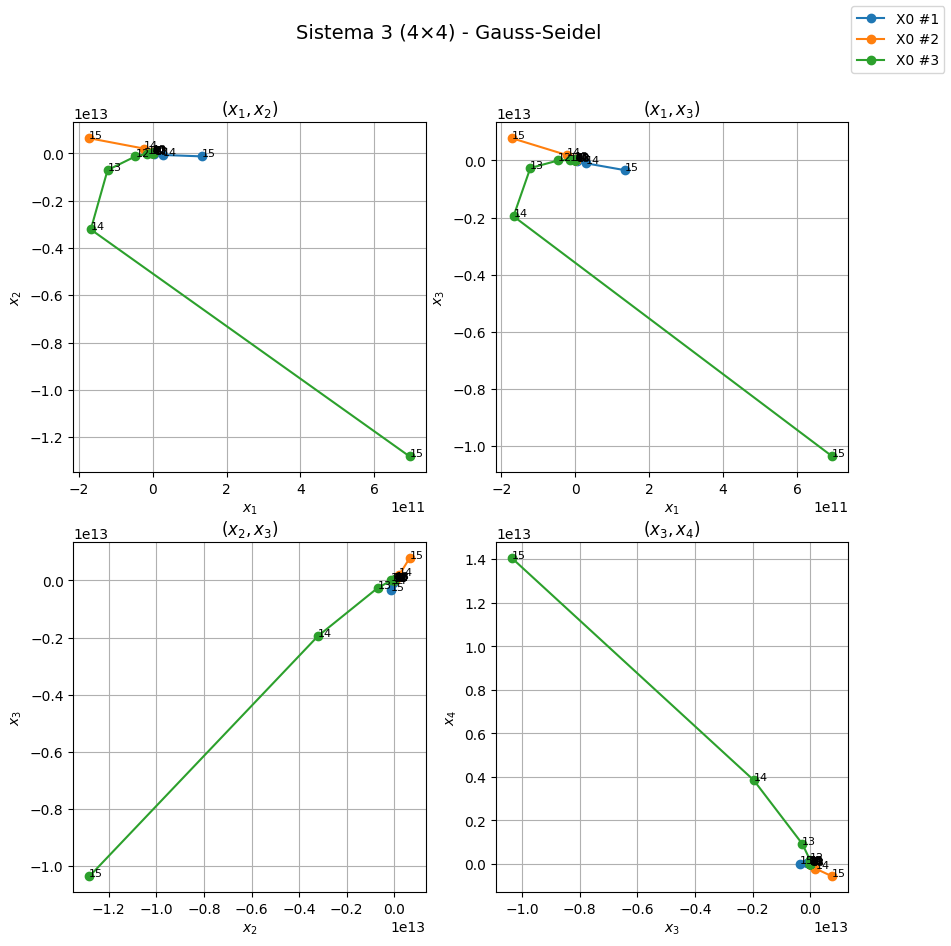

In [102]:
trajs3 = [gauss_seidel_traj(A3, b3, x0, max_iter=15) for x0 in x0_list_3]
plot_trajectories_4d(trajs3, "Sistema 3 (4×4) - Gauss-Seidel")


- **Sistema 1:** Como es diagonalmente dominante, los 2 métodos convergen hacia la solución, independientemente de las condiciones iniciales.
- **Sistema 2:** Como no es diagonalmente dominante, se observó que la convergencia depende de la estimación inicial. Por esta razón, algunas condiciones iniciales llevaron a la solución y otras divergen.
- **Sistema 3:** La falta de dominancia diagonal y la mayor dimensión del sistema provocaron un comportamiento más inestable porque se observó divergencia.